In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import sys
import sklearn.metrics as metrics

np.set_printoptions(threshold=sys.maxsize)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
cluster = pd.read_csv('AV_user_genre.csv', usecols=['user_id', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] ,engine='python').set_index('user_id')

In [5]:
#Silhouette Method to Indentify the best number of Clusters

for i in range(2,16):
    labels = KMeans(n_clusters=i,init="k-means++", random_state=200).fit(cluster).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(cluster,labels,metric="euclidean",random_state=200)))

Silhouette score for k(clusters) = 2 is 0.2125070643347769
Silhouette score for k(clusters) = 3 is 0.2036407277001578
Silhouette score for k(clusters) = 4 is 0.16308810992121078
Silhouette score for k(clusters) = 5 is 0.16984636479976992
Silhouette score for k(clusters) = 6 is 0.16418198175207943
Silhouette score for k(clusters) = 7 is 0.1653672545521449
Silhouette score for k(clusters) = 8 is 0.16052820426231895
Silhouette score for k(clusters) = 9 is 0.16274321618638973
Silhouette score for k(clusters) = 10 is 0.16188102213541938
Silhouette score for k(clusters) = 11 is 0.15757890880103026
Silhouette score for k(clusters) = 12 is 0.17188073972278714
Silhouette score for k(clusters) = 13 is 0.16741956743957387
Silhouette score for k(clusters) = 14 is 0.14082548640980178
Silhouette score for k(clusters) = 15 is 0.13859620054012964


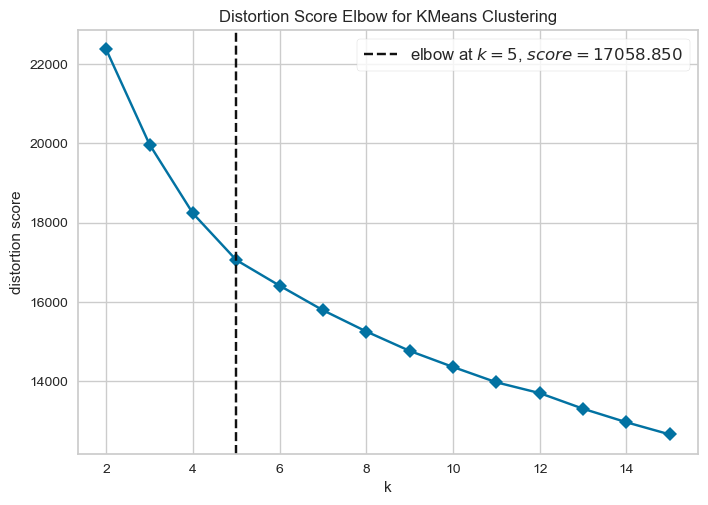

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=15, random_state=200), k=(2, 16),
                 timings=False)

In [6]:
#Elbow method to Indentify the best number of Clusters

from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=200),
                  cluster, metric='distortion',
                  k=(2, 16),
                  timings=False)

In [7]:
# users clustering using kmeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=1)
predictions = kmeans.fit(cluster)

In [8]:
#silhouette_score of clustering
metrics.silhouette_score(cluster,predictions.labels_,metric="euclidean")

0.15204600517381386

In [9]:
#SSE result of clustering
print(predictions.inertia_)

17520.589913055872


In [10]:
#add col cluster to ratings_av table
cluster['cluster'] = predictions.labels_
cluster

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
user_id,,,,,,,,,,,,,,,,,,,
1,3.333333,2.928571,3.333333,2.200000,3.472527,3.440000,4.8,3.925234,3.5,5.0,3.461538,2.923077,3.600000,3.931818,4.000000,3.615385,3.680000,3.666667,0
2,3.800000,4.333333,4.000000,3.000000,3.812500,3.777778,0.0,3.828571,3.0,4.5,3.000000,3.000000,3.500000,4.125000,3.750000,3.583333,3.666667,0.000000,4
3,2.785714,3.500000,0.000000,0.000000,2.583333,3.000000,5.0,2.909091,0.0,2.5,2.400000,2.000000,3.181818,3.400000,2.750000,2.523810,2.800000,0.000000,3
4,3.875000,3.500000,0.000000,0.000000,5.000000,4.750000,5.0,4.500000,0.0,0.0,4.000000,5.000000,4.000000,4.333333,3.833333,3.909091,4.500000,0.000000,3
5,3.142857,3.242424,3.785714,2.448276,3.000000,3.888889,0.0,2.666667,2.5,5.0,2.535714,3.333333,3.000000,2.315789,3.515152,2.947368,3.214286,2.500000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4.055556,3.500000,4.000000,4.000000,4.533333,4.333333,0.0,4.555556,4.0,0.0,3.000000,4.000000,4.000000,4.800000,4.125000,4.083333,5.000000,0.000000,1
940,3.434783,3.000000,4.500000,4.200000,3.523810,4.285714,0.0,3.604167,0.0,4.0,3.000000,3.142857,4.333333,3.541667,3.052632,3.350000,3.266667,0.000000,2
941,3.800000,3.857143,4.666667,4.500000,4.142857,3.000000,0.0,4.200000,0.0,0.0,0.000000,4.000000,5.000000,5.000000,3.875000,4.000000,5.000000,0.000000,1


In [ ]:
#save the output
cluster.to_csv('rating_genre_5cluster.csv')